<a href="https://colab.research.google.com/github/Ordaz-Yerikendy/Metodos-Numericos/blob/main/Polinomio%20Osculante%20de%20Hermite%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Definimos la función del polinomio de interpolación osculante de Hermite
def hermite_interpolation(x_points, y_points, y_derivatives=None):
    """
    Calcula el polinomio de interpolación osculante de Hermite para los puntos dados.

    Args:
        x_points (list): Lista de puntos x de la tabla.
        y_points (list): Lista de valores f(x) correspondientes a los puntos x.
        y_derivatives (list, optional): Lista de derivadas f'(x) correspondientes a los puntos x.
                                         Si no se proporcionan, se asumen derivadas nulas.

    Returns:
        sp.Expr: El polinomio de interpolación de Hermite en forma simbólica.
    """
    num_points = len(x_points)  # Número de puntos
    x = sp.symbols('x')  # Variable simbólica para construir el polinomio
    hermite_nodes = []  # Lista para almacenar los nodos repetidos
    divided_differences = []  # Tabla de diferencias divididas

    # Crear nodos repetidos para cada punto (dos veces por nodo)
    for i in range(num_points):
        hermite_nodes.append(x_points[i])
        hermite_nodes.append(x_points[i])

    # Inicializar la tabla de diferencias divididas con f(x) y f'(x)
    divided_differences = [[0] * (2 * num_points) for _ in range(2 * num_points)]
    for i in range(num_points):
        divided_differences[2 * i][0] = y_points[i]  # f(x) en el nodo original
        divided_differences[2 * i + 1][0] = y_points[i]  # f(x) en el nodo duplicado
        if y_derivatives:  # Si se proporcionan derivadas, añádelas a la tabla
            divided_differences[2 * i + 1][1] = y_derivatives[i]
        if i > 0:  # Diferencia dividida inicial para nodos consecutivos
            divided_differences[2 * i][1] = (
                (divided_differences[2 * i][0] - divided_differences[2 * i - 1][0])
                / (hermite_nodes[2 * i] - hermite_nodes[2 * i - 1])
            )

    # Completar el resto de la tabla de diferencias divididas
    for col in range(2, 2 * num_points):
        for row in range(2 * num_points - col):
            divided_differences[row][col] = (
                (divided_differences[row + 1][col - 1] - divided_differences[row][col - 1])
                / (hermite_nodes[row + col] - hermite_nodes[row])
            )

    # Construir el polinomio de Hermite
    hermite_polynomial = divided_differences[0][0]
    for col in range(1, 2 * num_points):
        term = divided_differences[0][col]
        for row in range(col):
            term *= (x - hermite_nodes[row])  # Producto acumulativo
        hermite_polynomial += term  # Sumar el término al polinomio

    return sp.expand(hermite_polynomial)  # Expandir para simplificar


In [27]:
# Definimos la función de la gráfica
def plot_hermite_polynomial(x_points, y_points, polynomial, num_plot_points=500):
    """
    Grafica el polinomio de Hermite junto con los puntos originales.

    Args:
        x_points (list): Lista de puntos x de la tabla.
        y_points (list): Lista de valores f(x) correspondientes a los puntos x.
        polynomial (sp.Expr): Polinomio de Hermite generado simbólicamente.
        num_plot_points (int): Número de puntos para graficar el polinomio.
    """
    x = sp.symbols('x')
    polynomial_function = sp.lambdify(x, polynomial, modules=["numpy"])

    # Generar puntos para evaluar el polinomio
    x_plot = np.linspace(min(x_points) - 1, max(x_points) + 1, num_plot_points)
    y_plot = polynomial_function(x_plot)

    # Graficar el polinomio
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label="Polinomio de Hermite", color='purple', linewidth=2)

    # Graficar los puntos originales
    plt.scatter(x_points, y_points, color='magenta', label="Puntos originales", zorder=5)

    # Personalización de la gráfica
    plt.title("Interpolación de Hermite")
    plt.xlabel("Eje x")
    plt.ylabel("f(x)/Eje y")
    plt.legend()
    plt.grid(color="pink", linestyle="--")
    plt.show()


Interpolación de Hermite
Ingrese el número de puntos: 5

Ingrese los valores de la tabla:
x[0]: -4
f(x[0]): 5
x[1]: 0
f(x[1]): 1
x[2]: -3
f(x[2]): 4
x[3]: 5
f(x[3]): 7
x[4]: -8
f(x[4]): 9

¿Conoces las derivadas f'(x)? (si/no): no

Polinomio de Hermite:
-7.38031606652169e-5*x**9 - 0.00126735979407947*x**8 - 0.00279985122810567*x**7 + 0.0536552698650517*x**6 + 0.274566429890718*x**5 - 0.292647828899678*x**4 - 3.93388696075456*x**3 - 6.3518130784403*x**2 - 1.0*x + 5.0


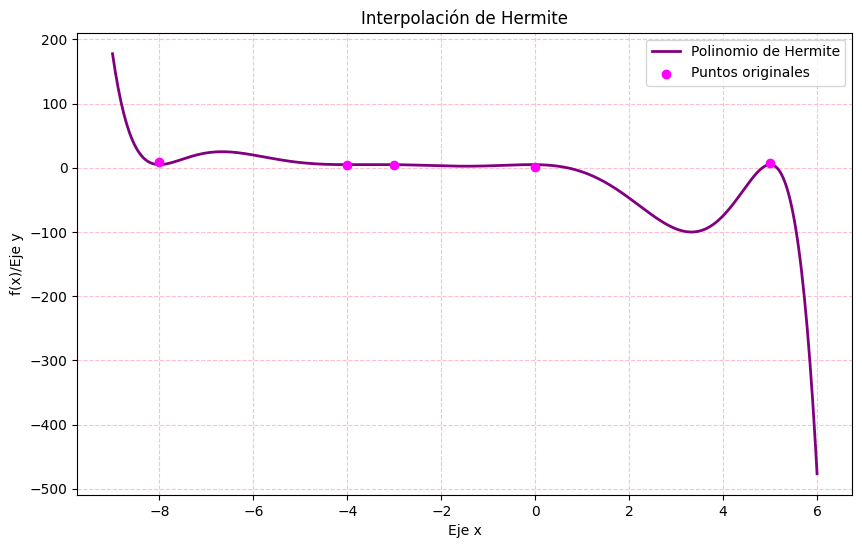

In [29]:
# Bloque principal del programa
if __name__ == "__main__":
    print("Interpolación de Hermite")

    # Solicitar el número de puntos al usuario
    num_points = int(input("Ingrese el número de puntos: "))

    x_points = []
    y_points = []
    y_derivatives = []

    # Solicitar valores de la tabla
    print("\nIngrese los valores de la tabla:")
    for i in range(num_points):
        x_value = float(input(f"x[{i}]: "))
        y_value = float(input(f"f(x[{i}]): "))
        x_points.append(x_value)
        y_points.append(y_value)

    # Solicitar derivadas si se conocen
    derivatives_known = input("\n¿Conoces las derivadas f'(x)? (si/no): ").strip().lower()
    if derivatives_known == 's':
        for i in range(num_points):
            dy_value = float(input(f"f'(x[{i}]): "))
            y_derivatives.append(dy_value)
    else:
        y_derivatives = [0] * num_points  # Asumir derivadas nulas si no se proporcionan

    # Calcular el polinomio de Hermite
    hermite_polynomial = hermite_interpolation(x_points, y_points, y_derivatives)
    print("\nPolinomio de Hermite:")
    print(hermite_polynomial)

    # Graficar el polinomio y los datos originales
    plot_hermite_polynomial(x_points, y_points, hermite_polynomial)

Elaborado por: Yerikendy Ordaz